In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv('combined.csv')


In [2]:
df.describe()

,source port,destination port,protocol,duration,TotalFwdPkts,TotalBwdPkts,TotLenfwdDL,TotLenfwdTR,TotLenfwdAPP,TotLenbwdDL,...,frameSrc,frameDst,TotPktsInFlow,mostCommonREQ_FUNC_CODE,mostCommonRESP_FUNC_CODE,corruptConfigFragments,deviceTroubleFragments,deviceRestartFragments,pktsFromMASTER,pktsFromSLAVE
count,323331.000000,323331.000000,323331.0,3.233310e+05,323331.000000,323331.000000,323331.000000,323331.000000,323331.000000,323331.000000,...,323331.000000,323331.000000,323331.000000,323331.000000,323331.000000,323331.0,323331.000000,323331.0,323331.000000,323331.000000
mean,41970.796054,24046.876226,6.0,6.117850e+07,33.152915,34.053431,396.424212,363.271298,293.119608,709.644841,...,3.709180,10.693432,67.206346,1.496952,128.867968,0.0,0.000037,0.0,33.083082,34.123264
std,12034.544339,9784.590559,0.0,4.875006e+07,26.093914,26.992718,290.944972,284.785887,279.660122,582.594318,...,3.828963,6.242263,53.082294,1.321802,5.775492,0.0,0.006092,0.0,26.142666,26.942988
min,20000.000000,20000.000000,6.0,0.000000e+00,1.000000,0.000000,7.000000,6.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,36742.000000,20000.000000,6.0,3.022128e+07,17.000000,16.000000,206.000000,181.000000,131.000000,168.000000,...,1.000000,1.000000,33.000000,1.000000,129.000000,0.0,0.000000,0.0,16.000000,17.000000
50%,41489.000000,20002.000000,6.0,5.802693e+07,31.000000,32.000000,321.000000,282.000000,204.000000,668.000000,...,3.000000,13.000000,63.000000,1.000000,129.000000,0.0,0.000000,0.0,31.000000,32.000000
75%,51678.000000,20003.000000,6.0,7.405260e+07,42.000000,43.000000,514.000000,452.000000,328.000000,794.000000,...,4.000000,15.000000,85.000000,1.000000,129.000000,0.0,0.000000,0.0,42.000000,43.000000
max,60980.000000,60993.000000,6.0,2.399956e+08,133.000000,137.000000,5199.000000,5171.000000,5059.000000,5242.000000,...,18.000000,18.000000,270.000000,5.000000,130.000000,0.0,1.000000,0.0,133.000000,137.000000


In [3]:

# Print the initial count of duplicates and NaN values
initial_duplicates = df.duplicated().sum()
initial_nans = df.isna().sum().sum()
print(f"Initial duplicate count: {initial_duplicates}")
print(f"Initial NaN count: {initial_nans}")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with any NaN values
df.dropna(inplace=True)

# Print the count of duplicates and NaN values after cleaning
after_cleaning_duplicates = df.duplicated().sum()
after_cleaning_nans = df.isna().sum().sum()
print(f"Duplicate count after cleaning: {after_cleaning_duplicates}")
print(f"NaN count after cleaning: {after_cleaning_nans}")


Initial duplicate count: 67988
Initial NaN count: 0
Duplicate count after cleaning: 0
NaN count after cleaning: 0


In [4]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()


In [5]:
print(correlation_matrix.to_string())

                          source port  destination port  protocol  duration  TotalFwdPkts  TotalBwdPkts  TotLenfwdDL  TotLenfwdTR  TotLenfwdAPP  TotLenbwdDL  TotLenbwdTR  TotLenbwdAPP  DLfwdPktLenMAX  DLfwdPktLenMIN  DLfwdPktLenMEAN  DLfwdPktLenSTD  TRfwdPktLenMAX  TRfwdPktLenMIN  TRfwdPktLenMEAN  TRfwdPktLenSTD  APPfwdPktLenMAX  APPfwdPktLenMIN  APPfwdPktLenMEAN  APPfwdPktLenSTD  DLbwdPktLenMAX  DLbwdPktLenMIN  DLbwdPktLenMEAN  DLbwdPktLenSTD  TRbwdPktLenMAX  TRbwdPktLenMIN  TRbwdPktLenMEAN  TRbwdPktLenSTD  APPbwdPktLenMAX  APPbwdPktLenMIN  APPbwdPktLenMEAN  APPbwdPktLenSTD  DLflowBytes/sec  TRflowBytes/sec  APPflowBytes/sec  FlowPkts/sec  FlowIAT_MEAN  FlowIAT_STD  FlowIAT_MAX  FlowIAT_MIN  TotalFwdIAT  fwdIAT_MEAN  fwdIAT_STD  fwdIAT_MAX  fwdIAT_MIN  TotalBwdIAT  bwdIAT_MEAN  bwdIAT_STD  bwdIAT_MAX  bwdIAT_MIN  DLfwdHdrLen  TRfwdHdrLen  APPfwdHdrLen  DLbwdHdrLen  TRbwdHdrLen  APPbwdHdrLen  fwdPkts/sec  bwdPkts/sec  DLpktLenMEAN  DLpktLenMIN  DLpktLenMAX  DLpktLenSTD  DLpktLenVAR  TR

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from scipy.stats import zscore

# Define the threshold for detecting outliers
threshold = 3

# Compute Z-score for numeric columns
z_scores = zscore(df[numeric_columns])

# Find outliers
outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]

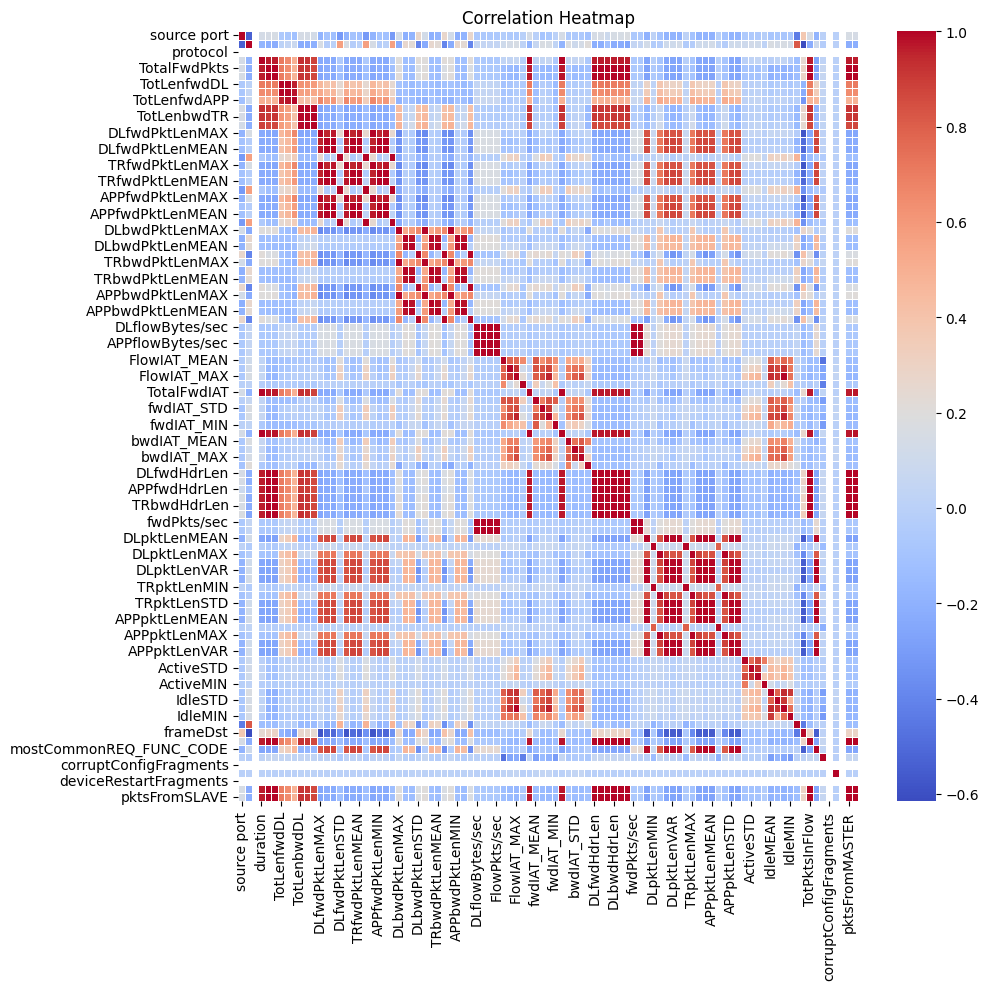

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_3292\1433675088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='TotalFwdPkts', data=df, palette='bright')


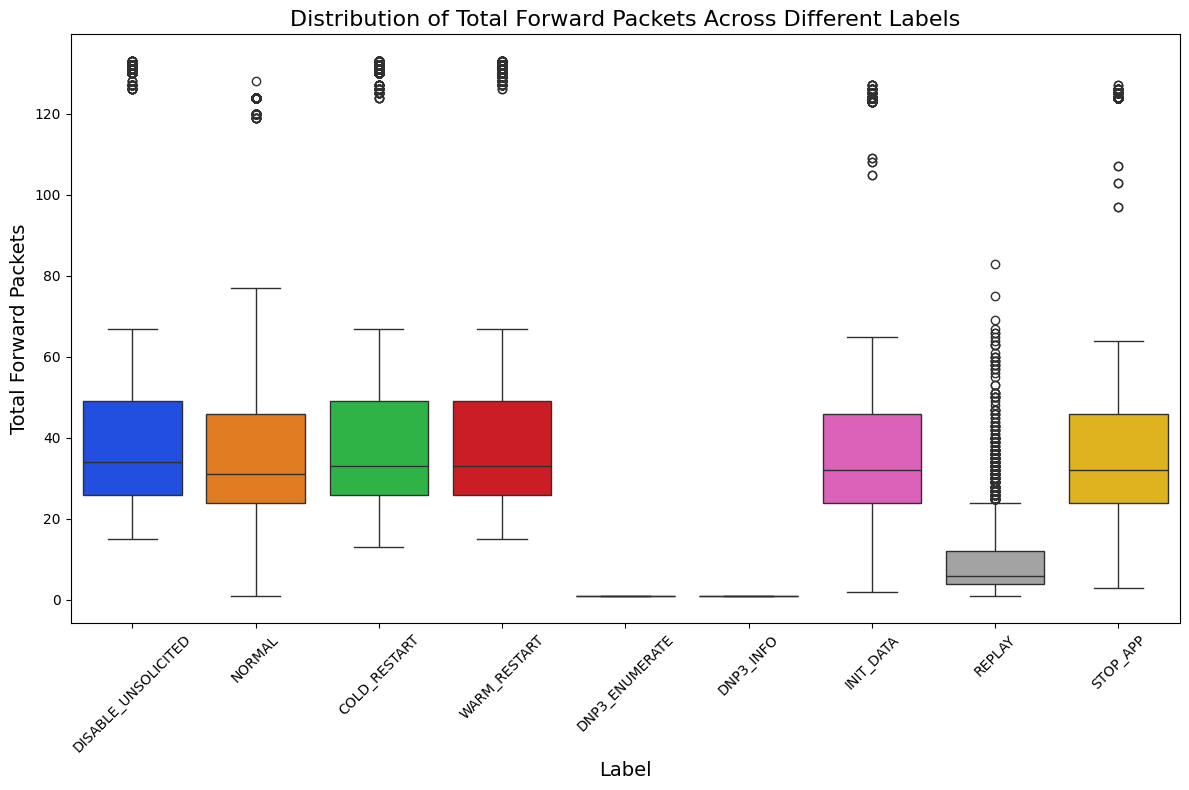

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Add the 'pastel' palette
sns.boxplot(x='Label', y='TotalFwdPkts', data=df, palette='bright')

plt.title('Distribution of Total Forward Packets Across Different Labels', fontsize=16)
plt.xticks(rotation=45)  # This ensures that the labels on the x-axis are readable
plt.xlabel('Label', fontsize=14)
plt.ylabel('Total Forward Packets', fontsize=14)

plt.tight_layout()  # This will make sure the plot fits well within the figure area
plt.show()

In [20]:
df['Label'].unique()

array(['DISABLE_UNSOLICITED', 'NORMAL', 'COLD_RESTART', 'WARM_RESTART',
       'DNP3_ENUMERATE', 'DNP3_INFO', 'INIT_DATA', 'REPLAY', 'STOP_APP'],
      dtype=object)

C:\Users\patil\AppData\Local\Temp\ipykernel_3292\1536500644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='TotalBwdPkts', data=df,palette="dark")


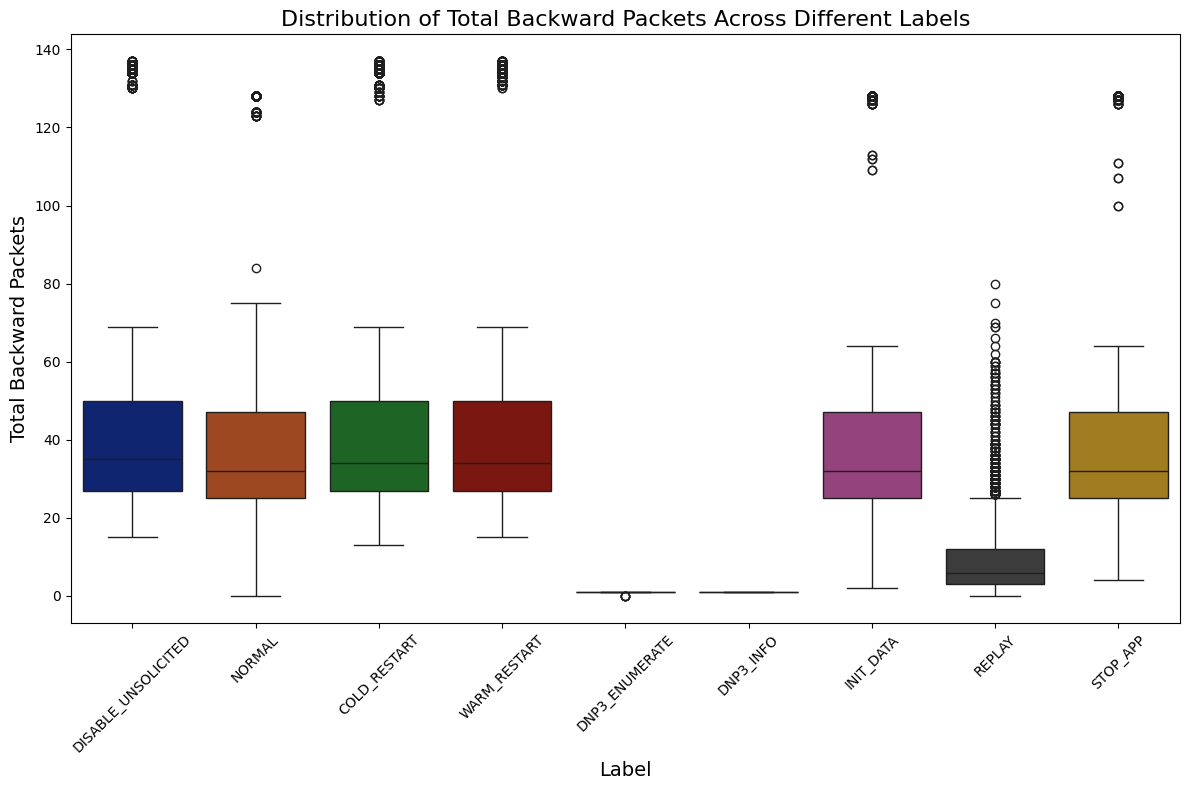

In [21]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='TotalBwdPkts', data=df,palette="dark")

plt.title('Distribution of Total Backward Packets Across Different Labels', fontsize=16)
plt.xticks(rotation=45)  # This ensures that the labels on the x-axis are readable
plt.xlabel('Label', fontsize=14)
plt.ylabel('Total Backward Packets', fontsize=14)

plt.tight_layout()  # This will make sure the plot fits well within the figure area
plt.show()

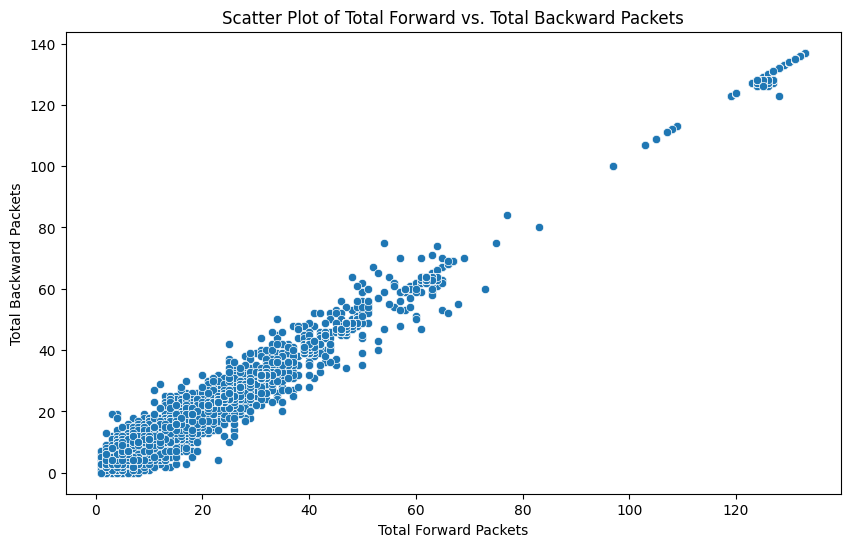

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalFwdPkts', y='TotalBwdPkts')
plt.title('Scatter Plot of Total Forward vs. Total Backward Packets')
plt.xlabel('Total Forward Packets')
plt.ylabel('Total Backward Packets')
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_3292\2352260161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette="colorblind")


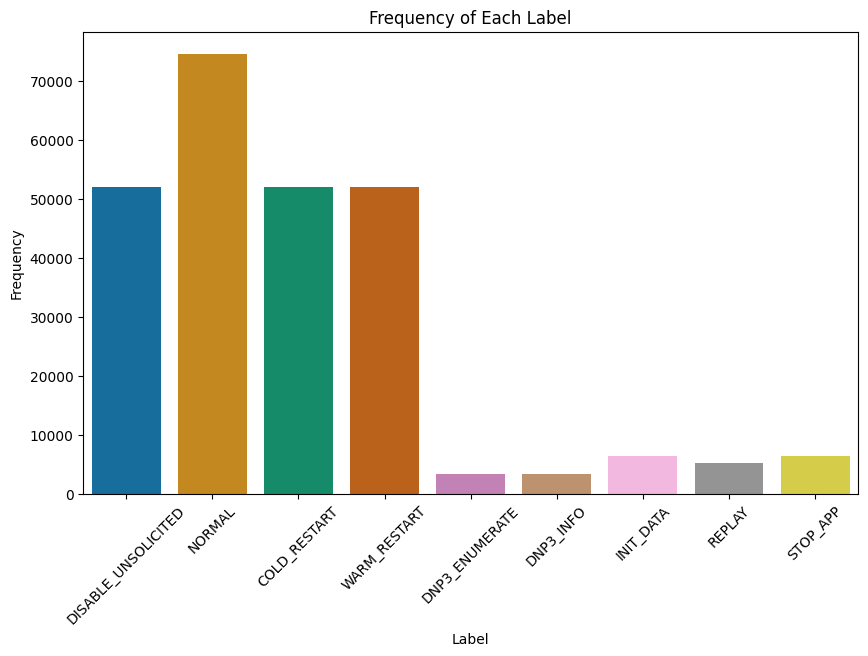

In [24]:
# Assuming 'Label' is the column with your categorical labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', palette="colorblind")
plt.title('Frequency of Each Label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating labels for better readability if necessary
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_3292\3245973271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='TotalFwdPkts', data=df, palette='bright')


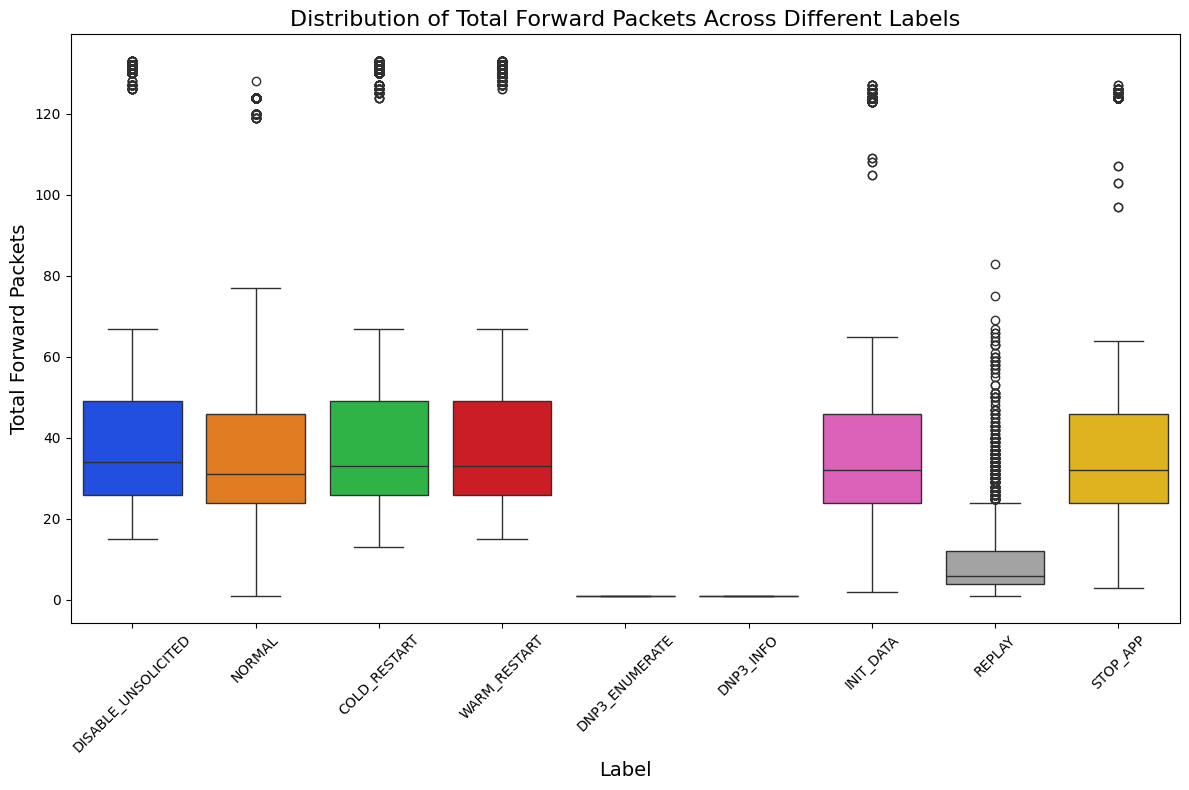

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='TotalFwdPkts', data=df, palette='bright')

plt.title('Distribution of Total Forward Packets Across Different Labels', fontsize=16)
plt.xticks(rotation=45)  # This ensures that the labels on the x-axis are readable
plt.xlabel('Label', fontsize=14)
plt.ylabel('Total Forward Packets', fontsize=14)

plt.tight_layout()  # This will make sure the plot fits well within the figure area
plt.show()

In [1]:

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with any NaN values
df.dropna(inplace=True)

# Columns to remove
columns_to_drop = ["flow ID", "source IP", "destination IP", "source port", "destination port", "date"]
df = df.drop(columns=columns_to_drop)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['protocol', 'firstPacketDIR', 'mostCommonREQ_FUNC_CODE', 'mostCommonRESP_FUNC_CODE', 'Label']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Store the encoded labels separately and drop from dataframe
y = df['Label']
X = df.drop('Label', axis=1)

# Feature scaling
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])



In [2]:

# Handling imbalanced dataset with SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


C:\Users\patil\AppData\Local\Temp\ipykernel_6816\4088645457.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=palette)
C:\Users\patil\AppData\Local\Temp\ipykernel_6816\4088645457.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette=palette)


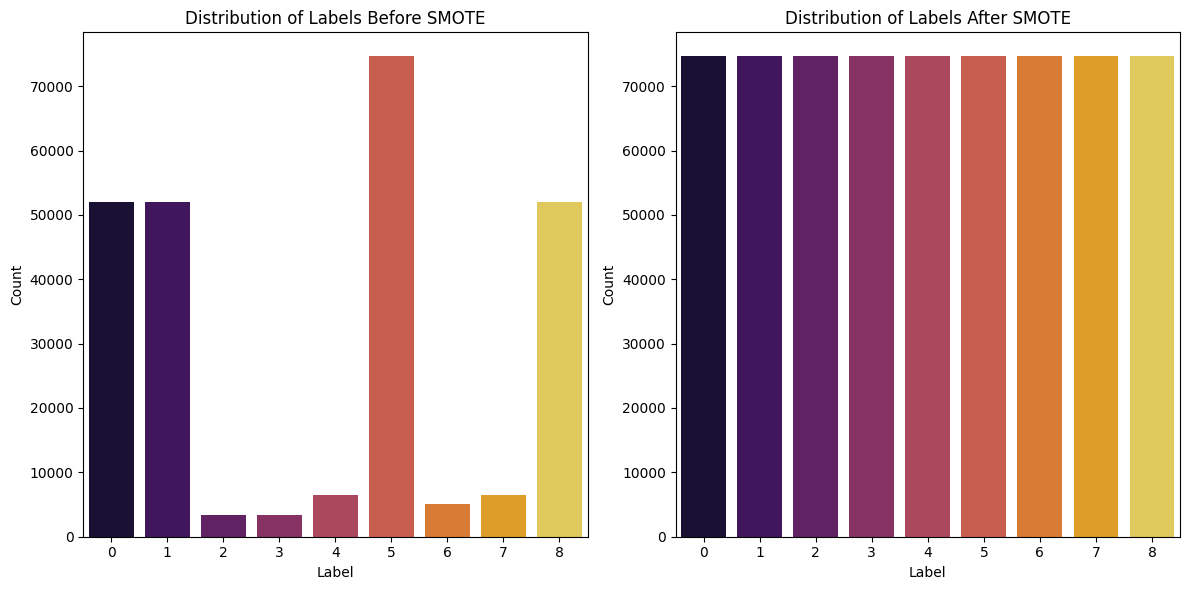

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a darker color palette
palette = sns.color_palette("inferno", len(y.unique()))

# Visualization before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x=y, palette=palette)
plt.title('Distribution of Labels Before SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')

# Visualization after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.countplot(x=y_res, palette=palette)
plt.title('Distribution of Labels After SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()